# Alcohol Consumption Patterns Analysis
This notebook implements a complete machine learning pipeline for analyzing alcohol consumption patterns. Our primary goal is to build a predictive model using Random Forest, with an emphasis on optimizing precision.

## Table of Contents
1. Data Loading and Initial Exploration
   1.1 Importing Libraries
   1.2 Loading the Dataset
   1.3 Initial Inspection
2. Data Cleaning and Preprocessing
3. Feature Engineering
4. Data Splitting
5. Model Training and Hyperparameter Tuning
6. Model Evaluation
7. Feature Importance Analysis
8. Saving the Model and Results

## 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer

## 2. Data Loading and Data Exploration

### 2.1 Loading the dataset

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_theme()

# Read data
print("Reading data...")
df = pd.read_csv('data/smoking_driking_dataset_Ver01.csv')
print("Data loaded successfully!")

Reading data...
Data loaded successfully!


### 2.2 Initial Inspection

In [3]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df['DRK_YN'].value_counts(normalize=True))

Dataset shape: (991346, 24)

First few rows:


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N



Data types:
sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

Missing values:
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           

## 3. Data Cleaning and Preprocessing

### 3.1 Handle placeholder values

In [4]:
placeholder_values = {
    'waistline': 999,
    'sight_left': 9.9,
    'sight_right': 9.9,
}

print("Replacing placeholder values with NaN")
for col, value in placeholder_values.items():
    df[col] = df[col].replace(value, np.nan)

print("Number of missing values after cleaning:")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])




Replacing placeholder values with NaN
Number of missing values after cleaning:
sex                    0
age                    0
height                 0
weight                 0
waistline             57
sight_left          3118
sight_right         3111
hear_left              0
hear_right             0
SBP                    0
DBP                    0
BLDS                   0
tot_chole              0
HDL_chole              0
LDL_chole              0
triglyceride           0
hemoglobin             0
urine_protein          0
serum_creatinine       0
SGOT_AST               0
SGOT_ALT               0
gamma_GTP              0
SMK_stat_type_cd       0
DRK_YN                 0
dtype: int64


### 3.2 Encoding categorical values

In [5]:
df['sex'] = (df['sex'] == 'Male').astype(int)

df['DRK_YN'] = (df['DRK_YN'] == 'Y').astype(int)

print("\nFirst few rows of the dataframe after encoding:")
display(df.head())



First few rows of the dataframe after encoding:


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


## 3. Feature Engineering

In [6]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['pulse_pressure'] = df['SBP'] - df['DBP']
df['mean_arterial_pressure'] = df['DBP'] + (df['pulse_pressure'] / 3)
df['vision_avg'] = (df['sight_left'] + df['sight_right']) / 2
df['hearing'] = np.where((df['hear_left'] == 2) | (df['hear_right'] == 2), 1, 0)
df['AST_ALT_ratio'] = df['SGOT_AST'] / df['SGOT_ALT']

new_features = ['BMI', 'pulse_pressure', 'mean_arterial_pressure', 'vision_avg', 'hearing', 'AST_ALT_ratio']
print("New features summary statistics:")
display(df[new_features].describe())

New features summary statistics:


,BMI,pulse_pressure,mean_arterial_pressure,vision_avg,hearing,AST_ALT_ratio
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,23.917129,46.379870,91.512584,0.951671,0.044892,1.192956
std,3.515028,9.804086,10.693022,0.315302,0.207068,0.984425
min,12.486993,3.000000,43.666667,0.100000,0.000000,0.006718
25%,21.484375,40.000000,83.666667,0.750000,0.000000,0.878788
50%,23.875115,46.000000,91.333333,0.950000,0.000000,1.130435
75%,25.951557,51.000000,98.000000,1.200000,0.000000,1.416667
max,45.714286,152.000000,202.000000,2.500000,1.000000,808.750000


## 4. Remove all outliers

In [7]:
def remove_outliers(df, columns, k=1.5):
    """
A function to remove outliers from the specified dataframe columns.

    Parameters:
    df (pandas.DataFrame): the original dataframe
    columns (list): list of columns to remove outliers for
    k (float): coefficient for calculating range boundaries
    """
    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        # Calculate the interquartile range (the difference between the largest and smallest values)
        iqr = q3 - q1

        #Replace values outside the range [q1 * qr, q3 + k * ir] with boundary values
        #clip -used to crop values 
        #lower: minimum value for cropping. If the value of the element is less than lower, it is replaced by lower.
        #upper: maximum value for cropping. If the value of the element is greater than upper, it is replaced by upper.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

df = remove_outliers(df,['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'] , k=1.5)

## 5. Data Splitting

In [8]:
X = df.drop(columns=['DRK_YN'])
y = df['DRK_YN']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (693942, 29)
Validation set shape: (148702, 29)
Test set shape: (148702, 29)


## 6. Model Training and Hyperparameter Tuning

In [ ]:
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    ConfusionMatrixDisplay, f1_score
)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
    'max_features': ['sqrt'],
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", test_accuracy_rf)

train_accuracy_rf = accuracy_score(y_train, best_rf.predict(X_train))
print(f'Training accuracy: {train_accuracy_rf:.2f}')


cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

c:\Users\ola\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


## 7. Model Evaluation

In [ ]:
def evaluate_model(model, X, y, set_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    
    print(f"\n{set_name} Set Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

train_metrics = evaluate_model(rf_model, X_train, y_train, 'Training')
val_metrics = evaluate_model(rf_model, X_val, y_val, 'Validation')
test_metrics = evaluate_model(rf_model, X_test, y_test, 'Test')

NameError: name 'best_rf' is not defined

## 8. Feature Importance Analysis

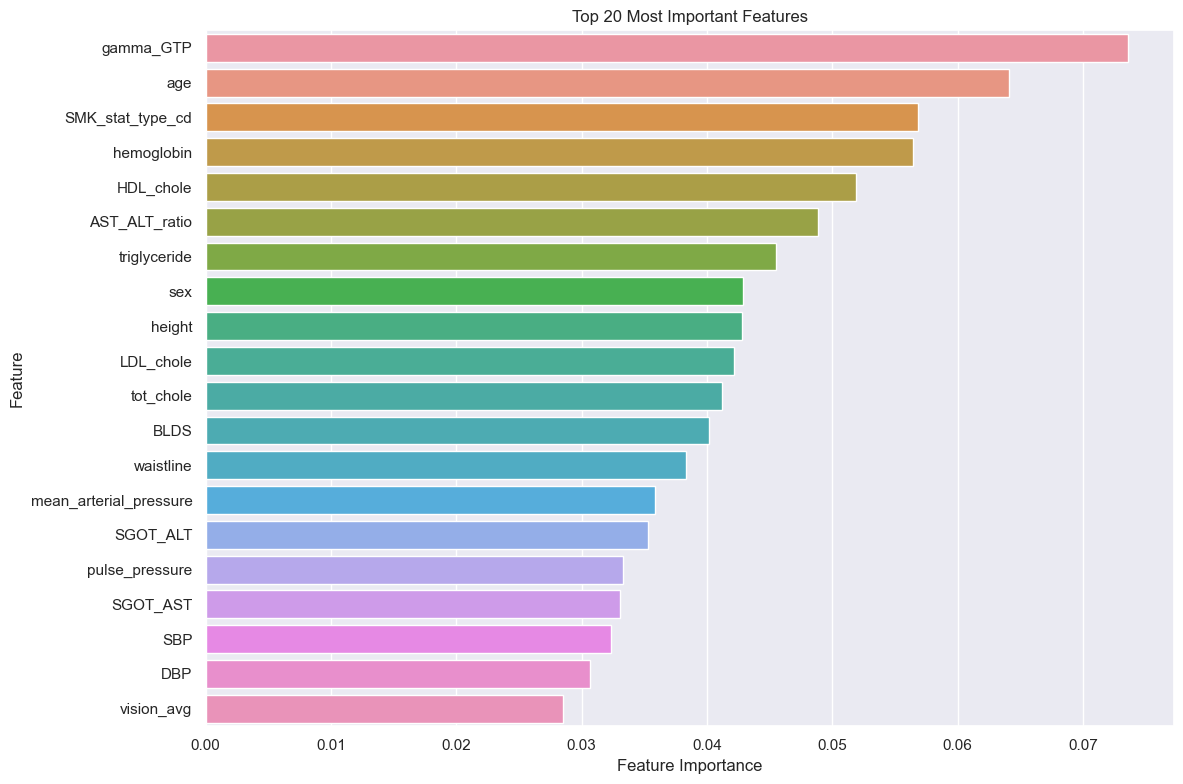

Top 20 most important features:


,feature,importance
21,gamma_GTP,0.073573
1,age,0.064051
22,SMK_stat_type_cd,0.056824
16,hemoglobin,0.056458
13,HDL_chole,0.051847
28,AST_ALT_ratio,0.048823
15,triglyceride,0.045516
0,sex,0.042902
2,height,0.042788
14,LDL_chole,0.042124


In [12]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance':rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top 20 most important features:")
display(feature_importances.head(20))